In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
data=pd.read_csv("cardio_train.csv",sep=";")

In [92]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [93]:
data.shape

(69301, 13)

In [94]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [96]:
#Chech Duplicate
data.duplicated().sum()

0

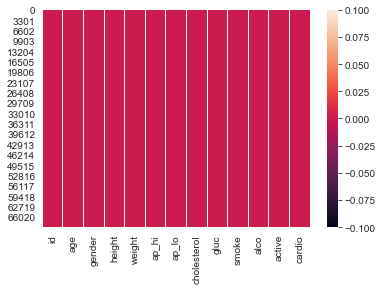

In [97]:
#To check missing value
sns.heatmap(data.isnull())

In [98]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [99]:
#Check Uniqueness
data.nunique()

id             69301
age             8069
gender             2
height           108
weight           285
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [100]:
data=data.drop("id",axis=1)

Univarate

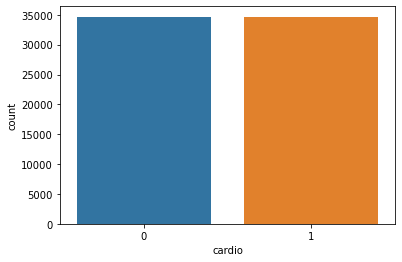

In [47]:
sns.countplot(x='cardio',data=data)

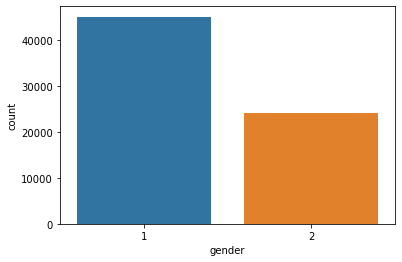

In [48]:
sns.countplot(x='gender',data=data)

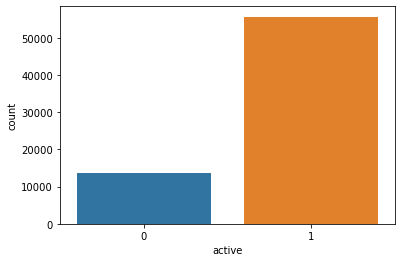

In [49]:
sns.countplot(x='active',data=data)

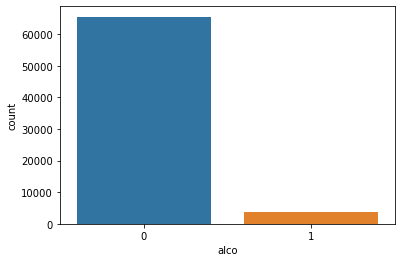

In [50]:
sns.countplot(x='alco',data=data)

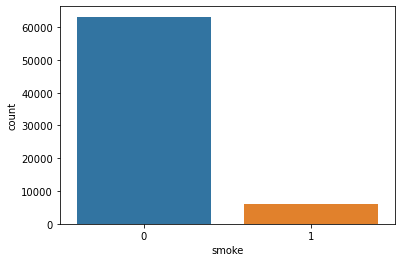

In [51]:
sns.countplot(x='smoke',data=data)

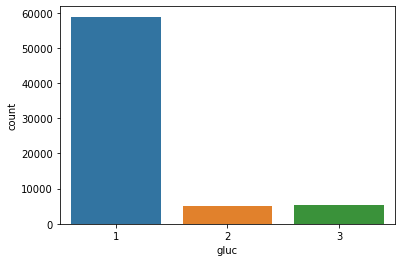

In [52]:
sns.countplot(x='gluc',data=data)

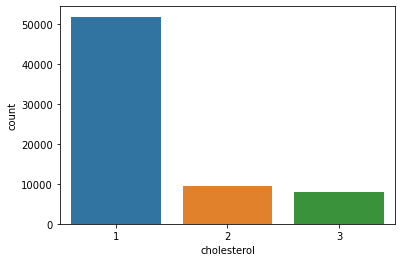

In [53]:
sns.countplot(x='cholesterol',data=data)

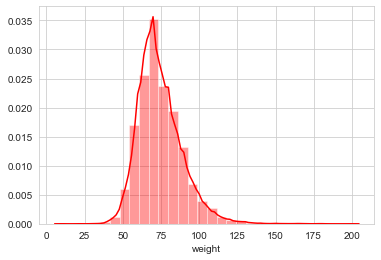

In [54]:
sns.set_style('whitegrid') 
sns.distplot(data['weight'], kde = True, color ='red', bins = 30) 

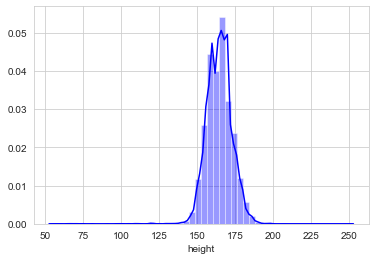

In [55]:
sns.set_style('whitegrid') 
sns.distplot(data['height'], kde = True, color ='blue')

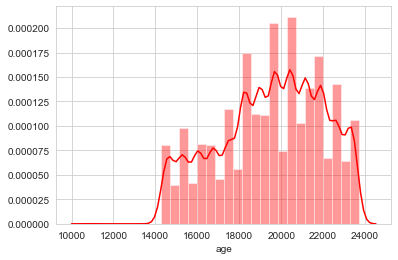

In [56]:
sns.set_style('whitegrid') 
sns.distplot(data['age'], kde = True, color ='red', bins = 30)

Bivariate

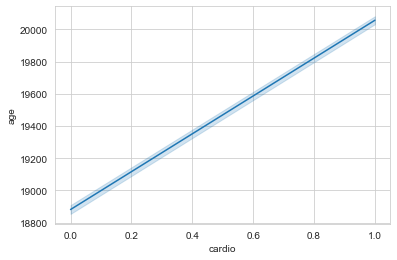

In [57]:
sns.lineplot(y='age',x='cardio',data=data)

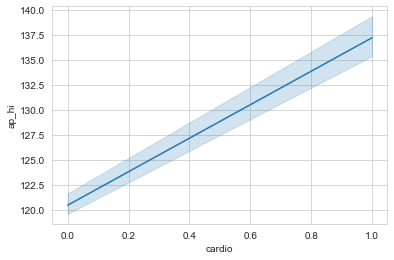

In [58]:
sns.lineplot(y='ap_hi',x='cardio',data=data)

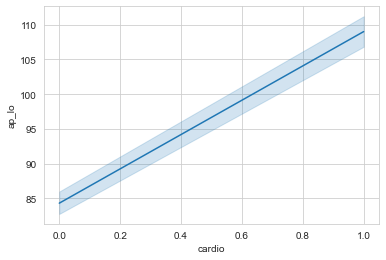

In [59]:
sns.lineplot(y='ap_lo',x='cardio',data=data)

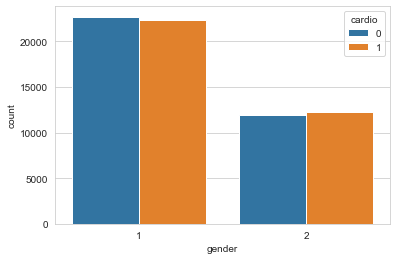

In [60]:
sns.countplot(x='gender',hue='cardio',data=data)

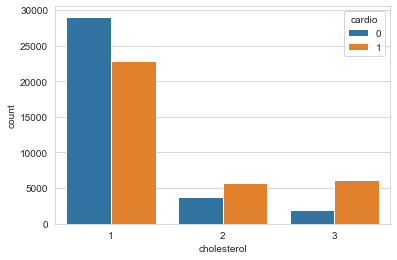

In [61]:
sns.countplot(x='cholesterol',hue='cardio',data=data)

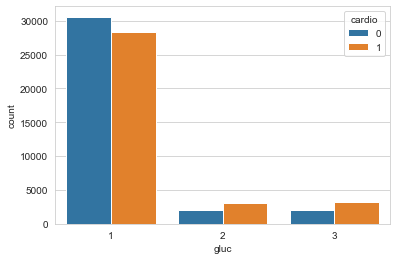

In [62]:
sns.countplot(x='gluc',hue='cardio',data=data)

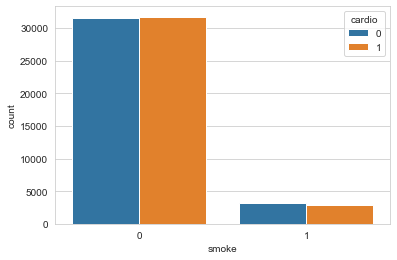

In [63]:
sns.countplot(x='smoke',hue='cardio',data=data)

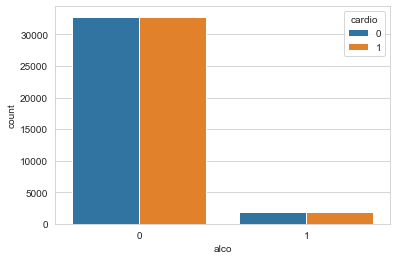

In [64]:
sns.countplot(x='alco',hue='cardio',data=data)

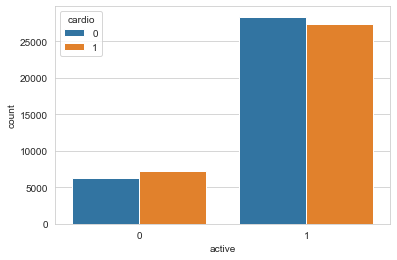

In [65]:
sns.countplot(x='active',hue='cardio',data=data)

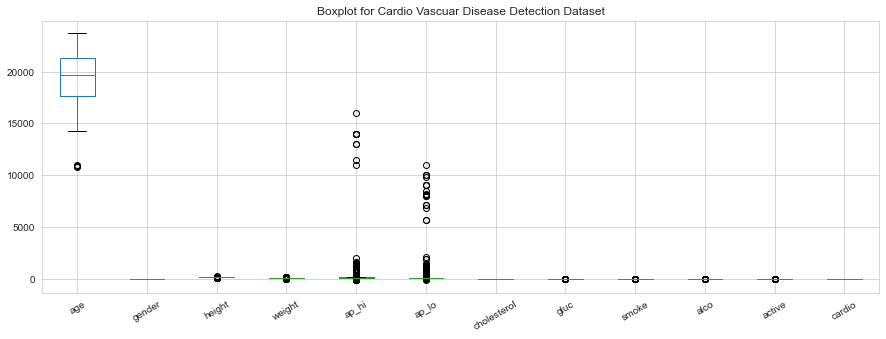

In [101]:
data.plot(kind='box',grid=True,title="Boxplot for Cardio Vascuar Disease Detection Dataset",legend=True,rot=30,figsize=(15,5))

In [102]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data=data.loc[(z_score < 3).all(axis=1)]
print(data.shape)

(69301, 12)
(55140, 12)


In [104]:
data.skew()

age           -0.289501
gender         0.902729
height         0.098899
weight         0.574304
ap_hi         -0.252020
ap_lo          4.735143
cholesterol    2.018967
gluc           3.202861
smoke          0.000000
alco           0.000000
active        -1.498342
cardio         0.061184
dtype: float64

In [105]:
for col in data.columns:
    if data.skew().loc[col] > 0.55:
        data[col]=np.log1p(data[col])
    if data.skew().loc[col]< -0.55:
        data[col]=np.log1p(data[col])


In [106]:
data.skew()

age            -0.289501
gender          0.902729
height          0.098899
weight          0.061585
ap_hi          -0.252020
ap_lo         -26.978257
cholesterol     1.815597
gluc            3.202861
smoke           0.000000
alco            0.000000
active         -1.498342
cardio          0.061184
dtype: float64

In [107]:
data.shape

(55140, 12)

In [115]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [112]:
data=data.dropna()

In [113]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,55139.000000,55139.000000,55139.000000,55139.000000,55139.000000,55139.000000,55139.000000,55139.000000,55139.0,55139.0,55139.000000,55139.000000
mean,19437.710477,0.812480,163.895482,4.287768,125.635485,1.685700,0.794662,0.723922,0.0,0.0,0.554364,0.484702
std,2470.830506,0.184785,7.563470,0.173743,17.750730,0.034502,0.210541,0.107383,0.0,0.0,0.277376,0.499770
min,14282.000000,0.693147,140.000000,3.496508,-150.000000,0.000000,0.693147,0.693147,0.0,0.0,0.000000,0.000000
25%,17622.000000,0.693147,158.000000,4.174387,120.000000,1.685370,0.693147,0.693147,0.0,0.0,0.693147,0.000000
50%,19680.000000,0.693147,164.000000,4.276666,120.000000,1.685370,0.693147,0.693147,0.0,0.0,0.693147,0.000000
75%,21306.500000,1.098612,169.000000,4.394449,140.000000,1.706721,0.693147,0.693147,0.0,0.0,0.693147,1.000000
max,23713.000000,1.098612,188.000000,4.770685,309.000000,2.001739,1.386294,1.098612,0.0,0.0,0.693147,1.000000


Features and Target Value

In [116]:
x=data.drop("cardio",axis=1)
y=data["cardio"]

In [117]:
x.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,0.693147,155,4.248495,130,1.68537,1.098612,1.098612,0,0,0.693147
1,14648,0.693147,163,4.276666,110,1.66064,0.693147,0.693147,0,0,0.693147


In [118]:
y.head(2)

0    0
1    1
Name: cardio, dtype: int64

In [119]:
y=y.round().astype(int)
y.unique()

array([0, 1])

In [120]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(55139, 1)

Standardisation

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 1.22684134, -0.64579742, -1.17612195, ...,  0.        ,
         0.        ,  0.50034569],
       [-1.93851982, -0.64579742, -0.11839678, ...,  0.        ,
         0.        ,  0.50034569],
       [ 0.99695704, -0.64579742,  0.14603452, ...,  0.        ,
         0.        ,  0.50034569],
       ...,
       [ 0.66224873, -0.64579742,  0.14603452, ...,  0.        ,
         0.        ,  0.50034569],
       [ 1.21146176, -0.64579742, -0.11839678, ...,  0.        ,
         0.        , -1.99861818],
       [ 0.4461251 , -0.64579742,  0.80711276, ...,  0.        ,
         0.        ,  0.50034569]])

Spilt Train and Test

In [122]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [123]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        fpr,tpr,thresholds=roc_curve(y_test,pred)
        roc_auc=auc(fpr,tpr)

        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    #print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print("fpr: ",fpr)
    print("tpr: ",tpr)
    print("thresholds: ",thresholds)
    print("roc_auc: ",roc_auc)
    print()
    print('prediction: ',pred)
     

    plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
    plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
    plt.legend(loc='best',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
    plt.show()
    
    return random_state

Logistic Regression

random_state for mod  is  113 which gives accuracy score of:  0.7320154757586749
confusion matrix:  [[6788 1724]
 [2846 5184]]
classification report:                precision    recall  f1-score   support

           0       0.70      0.80      0.75      8512
           1       0.75      0.65      0.69      8030

    accuracy                           0.72     16542
   macro avg       0.73      0.72      0.72     16542
weighted avg       0.73      0.72      0.72     16542

fpr:  [0.         0.20253759 1.        ]
tpr:  [0.         0.64557908 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7215207422354142

prediction:  [0 0 0 ... 1 0 1]


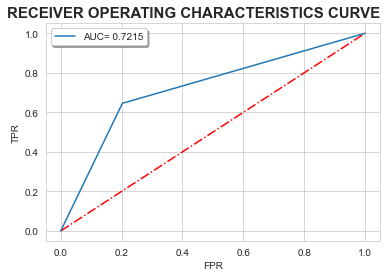

In [124]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

In [125]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.7255481240930116

DecisionTree

In [126]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 4}

random_state for mod  is  53 which gives accuracy score of:  0.7368516503445774
confusion matrix:  [[6551 1961]
 [2477 5553]]
classification report:                precision    recall  f1-score   support

           0       0.73      0.77      0.75      8512
           1       0.74      0.69      0.71      8030

    accuracy                           0.73     16542
   macro avg       0.73      0.73      0.73     16542
weighted avg       0.73      0.73      0.73     16542

fpr:  [0.         0.23038064 1.        ]
tpr:  [0.         0.69153176 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7305755584087866

prediction:  [0 0 0 ... 1 0 1]


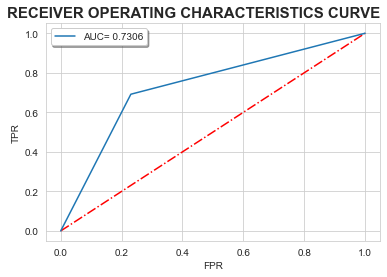

In [127]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc=rst(dt,x,y)

In [128]:
#Cross Validation
accuracy_score_2=cross_val_score(dt,x,y,scoring='accuracy',cv=15).mean()
accuracy_score_2

0.7297012280429039

GaussianNB

random_state for mod  is  124 which gives accuracy score of:  0.7085600290170475
confusion matrix:  [[6774 1738]
 [3281 4749]]
classification report:                precision    recall  f1-score   support

           0       0.67      0.80      0.73      8512
           1       0.73      0.59      0.65      8030

    accuracy                           0.70     16542
   macro avg       0.70      0.69      0.69     16542
weighted avg       0.70      0.70      0.69     16542

fpr:  [0.         0.20418233 1.        ]
tpr:  [0.         0.59140722 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6936124460435024

prediction:  [0 0 0 ... 1 0 0]


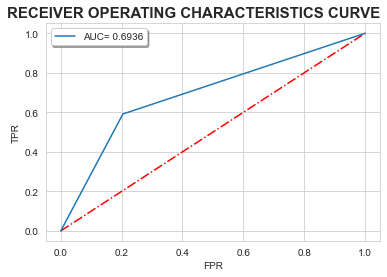

In [129]:
nb=GaussianNB()
gnb=rst(nb,x,y)

In [130]:
#Cross Validation
accuracy_score_3=cross_val_score(nb,x,y,scoring='accuracy',cv=5).mean()
accuracy_score_3

0.698870038684682

Gradient Boosting

In [133]:
gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)

gb_param= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gb_g= GridSearchCV(gb,gb_param,cv=15)
gb_g.fit(x_train,y_train)
print("best parameters:", gb_g.best_params_)
print("\n best score:",gb_g.best_score_)

best parameters: {'learning_rate': 0.025, 'n_estimators': 250}

 best score: 0.7349532576504983


random_state for mod  is  76 which gives accuracy score of:  0.7398742594607666
confusion matrix:  [[6787 1725]
 [2611 5419]]
classification report:                precision    recall  f1-score   support

           0       0.72      0.80      0.76      8512
           1       0.76      0.67      0.71      8030

    accuracy                           0.74     16542
   macro avg       0.74      0.74      0.74     16542
weighted avg       0.74      0.74      0.74     16542

fpr:  [0.         0.20265508 1.        ]
tpr:  [0.         0.67484433 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7360946292802367

prediction:  [0 0 0 ... 1 0 0]


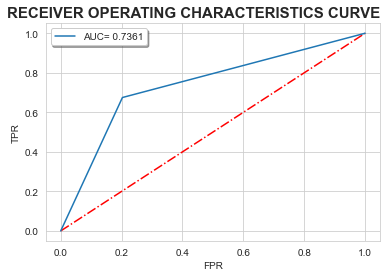

In [134]:
gb=GradientBoostingClassifier(learning_rate=0.025, n_estimators= 250)
gbc=rst(gb,x,y)

In [135]:
#Cross Validation
accuracy_score_5=cross_val_score(gb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_5

0.7330746148796845

In [138]:
import joblib
joblib.dump(gbc,"Cardiovascular.pkl")

['Cardiovascular.pkl']